# CAP-465:Modelling and Simulation of Earth Systems
## Exercise II: Fire in the Forest

Investigate  the fire-in-the-forestmodel  and  analyse the  results  related  to  the duration  of  the  fire,  the  number  of  cells  burned,  and  the  number  of  forest  cells that  survive  at  the  end  of  the  simulations. Repeat  50 simulations  with  different percentages  of  initial  forest  ranging  from  0%  to  100%  to analyse  the  following scenarios:

1. The originalmodel.
2. Using a Mooreneighborhood (8neighbors), instead of von Neumann.
3. Aburning cell becomes burned after twotime steps, instead of only one.
4. Changing space  to  100x100  cells.  Compare  this  result  with  the  others  by assuming  that  four  cells  in  this  case  occupy  the  same  space  of  one  cell  in the  original  model,  which  means  that  the  overall  area  is  the  samein different resolutions.
5. There  is  a  probability  of  90%  that  a  cell  will  burn  if  it  findsa  burning neighbor, adding anotherrandom component to the model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('fire.csv',sep=';',error_bad_lines=False)

In [3]:
def forest(dim=50,neighborhood="vonneumann",periodBurning=1,probability=1):
    fil=df.dim==dim
    df2=df[fil]
    fil=df2.neighborhood==neighborhood
    df2=df2[fil]
    fil=df2.periodBurning==periodBurning
    df2=df2[fil]
    fil=df2.probability==probability
    df2=df2[fil]
    return df2.groupby(['initialForest']).mean().forest/df2['dim'].mean()**2

(0.1, 0.9)

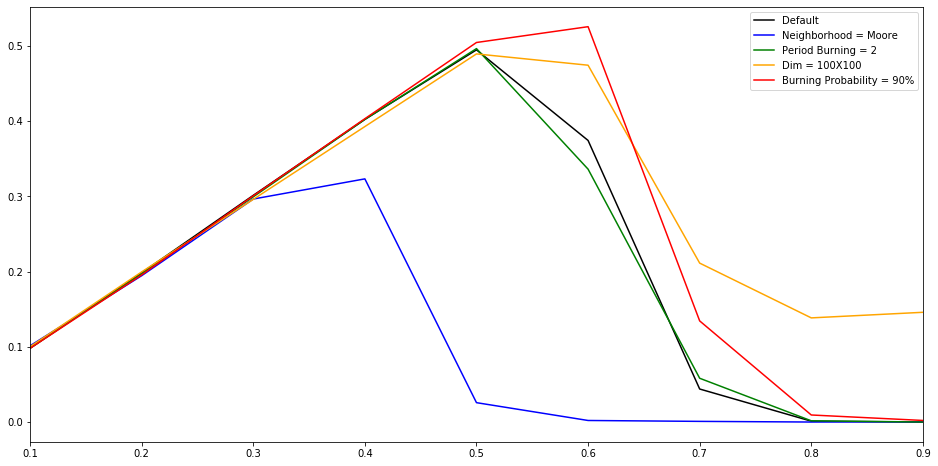

In [4]:
ex=pd.DataFrame()
ex['e1']=forest()
ex['e2']=forest(neighborhood="moore")
ex['e3']=forest(periodBurning=2)
ex['e4']=forest(dim=100)
ex['e5']=forest(probability=.9)

plt.figure(figsize=(16, 8))
plt.plot(ex.e1,label='Default',color='k')
plt.plot(ex.e2,label='Neighborhood = Moore',color='b')
plt.plot(ex.e3,label='Period Burning = 2',color='g')
plt.plot(ex.e4,label='Dim = 100X100',color='orange')
plt.plot(ex.e5,label='Burning Probability = 90%',color='r')
plt.legend()
plt.xlim(.1,.9)

(0.1, 0.9)

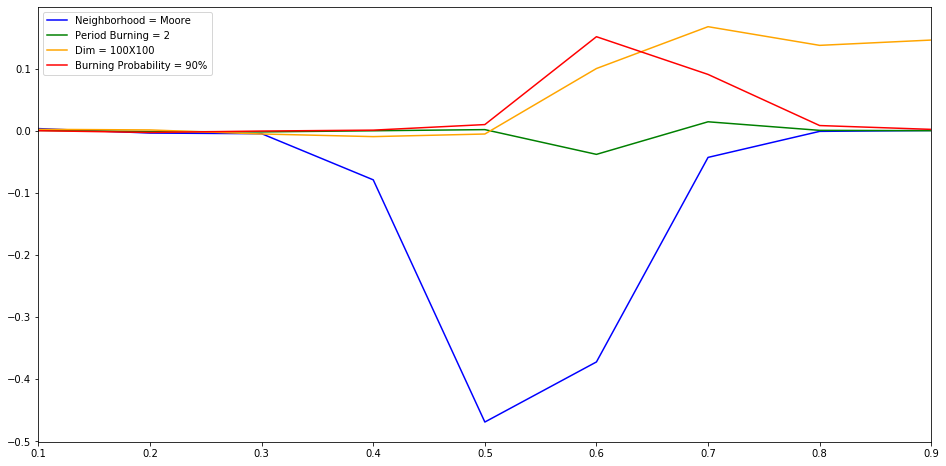

In [5]:
plt.figure(figsize=(16, 8))
plt.plot(-ex.e1+ex.e2,label='Neighborhood = Moore',color='b')
plt.plot(-ex.e1+ex.e3,label='Period Burning = 2',color='g')
plt.plot(-ex.e1+ex.e4,label='Dim = 100X100',color='orange')
plt.plot(-ex.e1+ex.e5,label='Burning Probability = 90%',color='r')
plt.legend()
plt.xlim(.1,.9)

As simulações com estratégia de moore, em azul, resultam em menor proporção entre a células de floresta com relação à grade, pois considera do dobro de células como vizinhas com relação a estratégia de vonneumann.

Para simulações onde ocorre a queimada apenas a cada dois passos de tempo, em verde, ocorrem mais queimadas para mapas com densidade inicial de células de floresta de 60%. Para queimadas para com densidade inicial de floresta de 70% ocorrem menos queimadas.

Considerando um mapa o dobro de resolução, em laranja, a proporção de floresta resultante é maior pois o fogo se propaga com a mesma velocidade do modelo com menor grade.

Para simulações com probabilidade que queimar uma célula vizinha de 90%, vermelho, ocorrem menos queimadas, pois a propagação não ocorre sempre que uma célula de floresta entra em contato com a uma célula de fogo.


In [21]:
def forest(dim=50,neighborhood="vonneumann",periodBurning=1,probability=1):
    fil=df.dim==dim
    df2=df[fil]
    fil=df2.neighborhood==neighborhood
    df2=df2[fil]
    fil=df2.periodBurning==periodBurning
    df2=df2[fil]
    fil=df2.probability==probability
    df2=df2[fil]
    df2.forest=df2.forest/df2['dim'].mean()**2
    return df2


In [22]:
teste=pd.DataFrame()
frames=[forest(),forest(neighborhood="moore"),
        forest(periodBurning=2),forest(dim=100),forest(probability=.9)]

teste=pd.concat(frames);


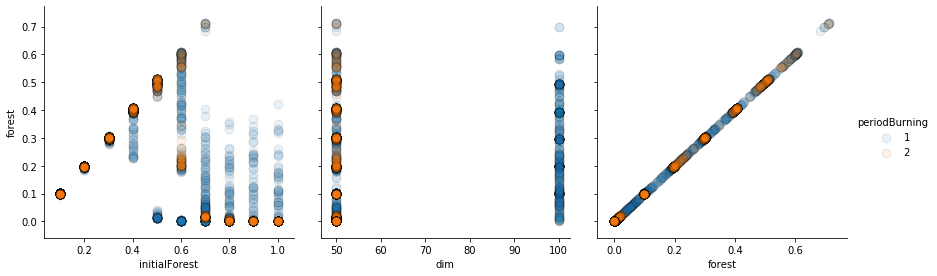

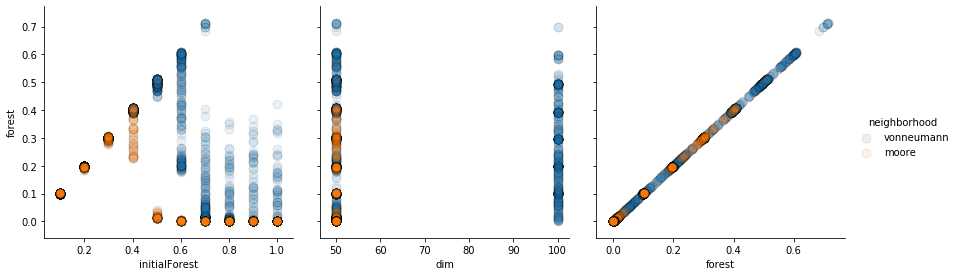

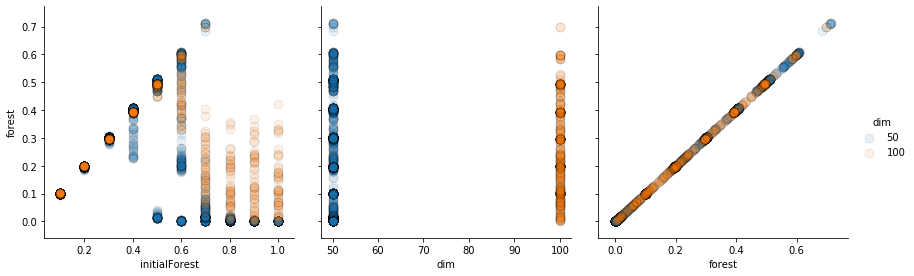

In [17]:
import seaborn as sns
sns.pairplot(data=teste,x_vars=['initialForest','dim','forest'],y_vars=['forest'],hue='periodBurning',
             diag_kind = 'kde',plot_kws = {'alpha': 0.1, 's': 80, 'edgecolor': 'k'}, size = 4)

sns.pairplot(data=teste,x_vars=['initialForest','dim','forest'],y_vars=['forest'],hue='neighborhood',
             diag_kind = 'kde',plot_kws = {'alpha': 0.1, 's': 80, 'edgecolor': 'k'}, size = 4)

sns.pairplot(data=teste,x_vars=['initialForest','dim','forest'],y_vars=['forest'],hue='dim',
             diag_kind = 'kde',plot_kws = {'alpha': 0.1, 's': 80, 'edgecolor': 'k'}, size = 4)

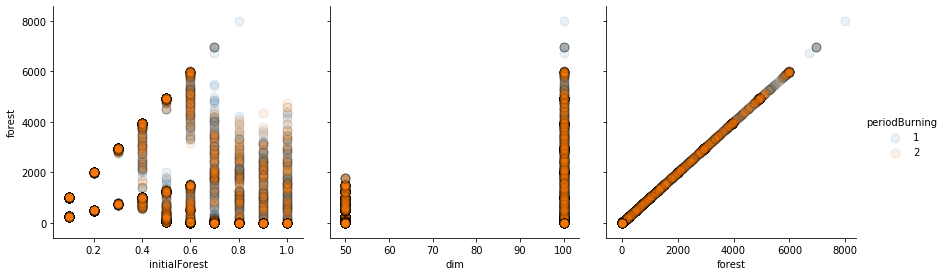

In [20]:
sns.pairplot(data=df,x_vars=['initialForest','dim','forest'],y_vars=['forest'],hue='periodBurning',
             diag_kind = 'kde',plot_kws = {'alpha': 0.1, 's': 80, 'edgecolor': 'k'}, size = 4)